# Property selling price prediction using multiple linear regression, October 2017
## Introduction
* This project is my first practical experience working with regression for making quantitative predictions.
* Our datasets contain 79 explanatory variables describing attributes of homes in Ames, Iowa. We'll use the features in our training data to develop a mutliple regression model for predicting the selling price of a home in the test data.
* The testing and training data, and explanation of variables, can be found on Kaggle: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import math
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression, SelectKBest

## Initial Observations
Let's see what we're working with.

In [2]:
df_train = pd.read_csv('/Users/jordanbauer/Data Mining Learning/Personal Projects/Multiple Regression/real_estate_train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_train.shape

(1460, 81)

In [4]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## First steps
First we'll look at relevant features, and then move to take care of missing data, outliers, or anything else that might influence our analysis. The observation unique ID is its own column, so we'll set that as the index.

In [6]:
df_train.set_index('Id', inplace=True)
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


### Data Cleaning
The NaN values in PoolQC, Fence, Alley, etc. are not missing values but instead indicate that the property has no pool, fence, alley, and so on. We'll have to refactor those values before we proceed.

* PoolQC
* Alley
* Fence
* Misc
* GarageCond
* GarageQual
* GarageFinish
* GarageType
* FireplaceQu
* BsmtFinType2
* BsmtFinType1
* BsmtExposure
* BsmtCond
* BsmtQual

In [7]:
refactor_vars = ['PoolQC', 'Alley', 'Fence', 'MiscFeature', 'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType',
                 'FireplaceQu', 'BsmtFinType2', 'BsmtFinType1', 'BsmtExposure', 'BsmtCond', 'BsmtQual']

for var in refactor_vars:
    df_train[refactor_vars].fillna(value='N', axis=1, inplace=True)

/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2842: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


We should make adjustments to the variables with year data. Years are categorical, and when we create dummy variables, we might end up having dozens of different variables as years; some years may be represented in our training data and unrepresented in our test data. To avoid this hang up, we'll bin the years into decades. This will result in some information loss, but we don't need a dummy variable for every year.
* 0 = 1889 and older
* 1 = 1890 - 1899
* 2 = 1900 - 1909
* 3 = 1910 - 1919
* 4 = 1920 - 1929
* 5 = 1930 - 1939
* 6 = 1940 - 1949
* 7 = 1950 - 1959
* 8 = 1960 - 1969
* 9 = 1970 - 1979
* 10 = 1980 - 1989
* 11 = 1990 - 1999
* 12 = 2000 - 2009
* 13 = 2010+

In [8]:
for var in ['YearBuilt', 'YearRemodAdd']:
    df_train.loc[df_train[var] <= 1889, var] = 0
    df_train.loc[(df_train[var] >= 1890) & (df_train[var] < 1900), var] = 1
    df_train.loc[(df_train[var] >= 1900) & (df_train[var] < 1910), var] = 2
    df_train.loc[(df_train[var] >= 1910) & (df_train[var] < 1920), var] = 3
    df_train.loc[(df_train[var] >= 1920) & (df_train[var] < 1930), var] = 4
    df_train.loc[(df_train[var] >= 1930) & (df_train[var] < 1940), var] = 5
    df_train.loc[(df_train[var] >= 1940) & (df_train[var] < 1950), var] = 6
    df_train.loc[(df_train[var] >= 1950) & (df_train[var] < 1960), var] = 7
    df_train.loc[(df_train[var] >= 1960) & (df_train[var] < 1970), var] = 8
    df_train.loc[(df_train[var] >= 1970) & (df_train[var] < 1980), var] = 9
    df_train.loc[(df_train[var] >= 1980) & (df_train[var] < 1990), var] = 10
    df_train.loc[(df_train[var] >= 1990) & (df_train[var] < 2000), var] = 11
    df_train.loc[(df_train[var] >= 2000) & (df_train[var] < 2010), var] = 12
    df_train.loc[(df_train[var] >= 2010), var] = 13

In [9]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Missing Data
Now we'll look for and handle missing entries in our data.

In [10]:
def show_missing(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    df = pd.concat([total, percent], axis=1, keys=['Count', '% of Missing Data'])
    df = df[df['Count'] > 0]
    return df

missing_1 = show_missing(df_train)
missing_1

,Count,% of Missing Data
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


We do have some missing data, but rather than removing observations, we'll look to see if any of these variables with missing data will prove useful in our analysis. If they do, we'll need to come back and make changes.

## Feature Selection
We'll pick out our useful variables, and then take care of outliers that might affect those relationships.

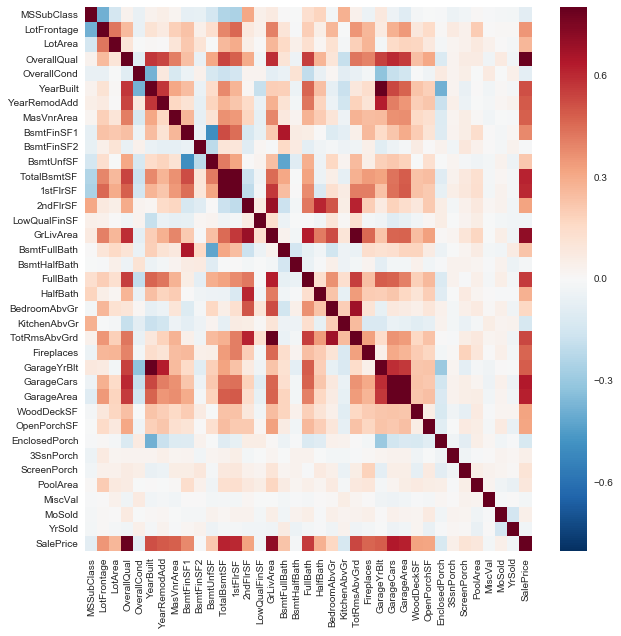

In [11]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 10))
df_train_corr = df_train.corr()
sns.heatmap(df_train_corr, vmax=0.8)

We'll take a look at the variables most highly correlated with SalePrice and choose the variables with a strong relationship with selling price; we'll set that threshold at or above 0.5.

In [12]:
stack_cor = df_train_corr.stack()
stack_cor['SalePrice'].abs().sort_values(axis=0, ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.516137
YearRemodAdd     0.492294
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
dtype: float64

So here we have the variables with the strongest correlation with selling price:
* Overall quality (OverallQual)
* Above-grade living area in square feet (GrLivArea)
* Garage car capacity (GarageCars)
* Garage area in square feet (GarageArea)
* Basement area in square feet (TotalBsmtSF)
* First floor area in square feet (1stFlrSF)
* Number of full bathrooms above grade (FullBath)
* Total rooms above grade (TotRmsAbvGrd)
* Year property was built (YearBuilt)
* Year property was remodelled (YearRemodAdd)
    *Same as YearBuilt if the property wasn't remodelled.

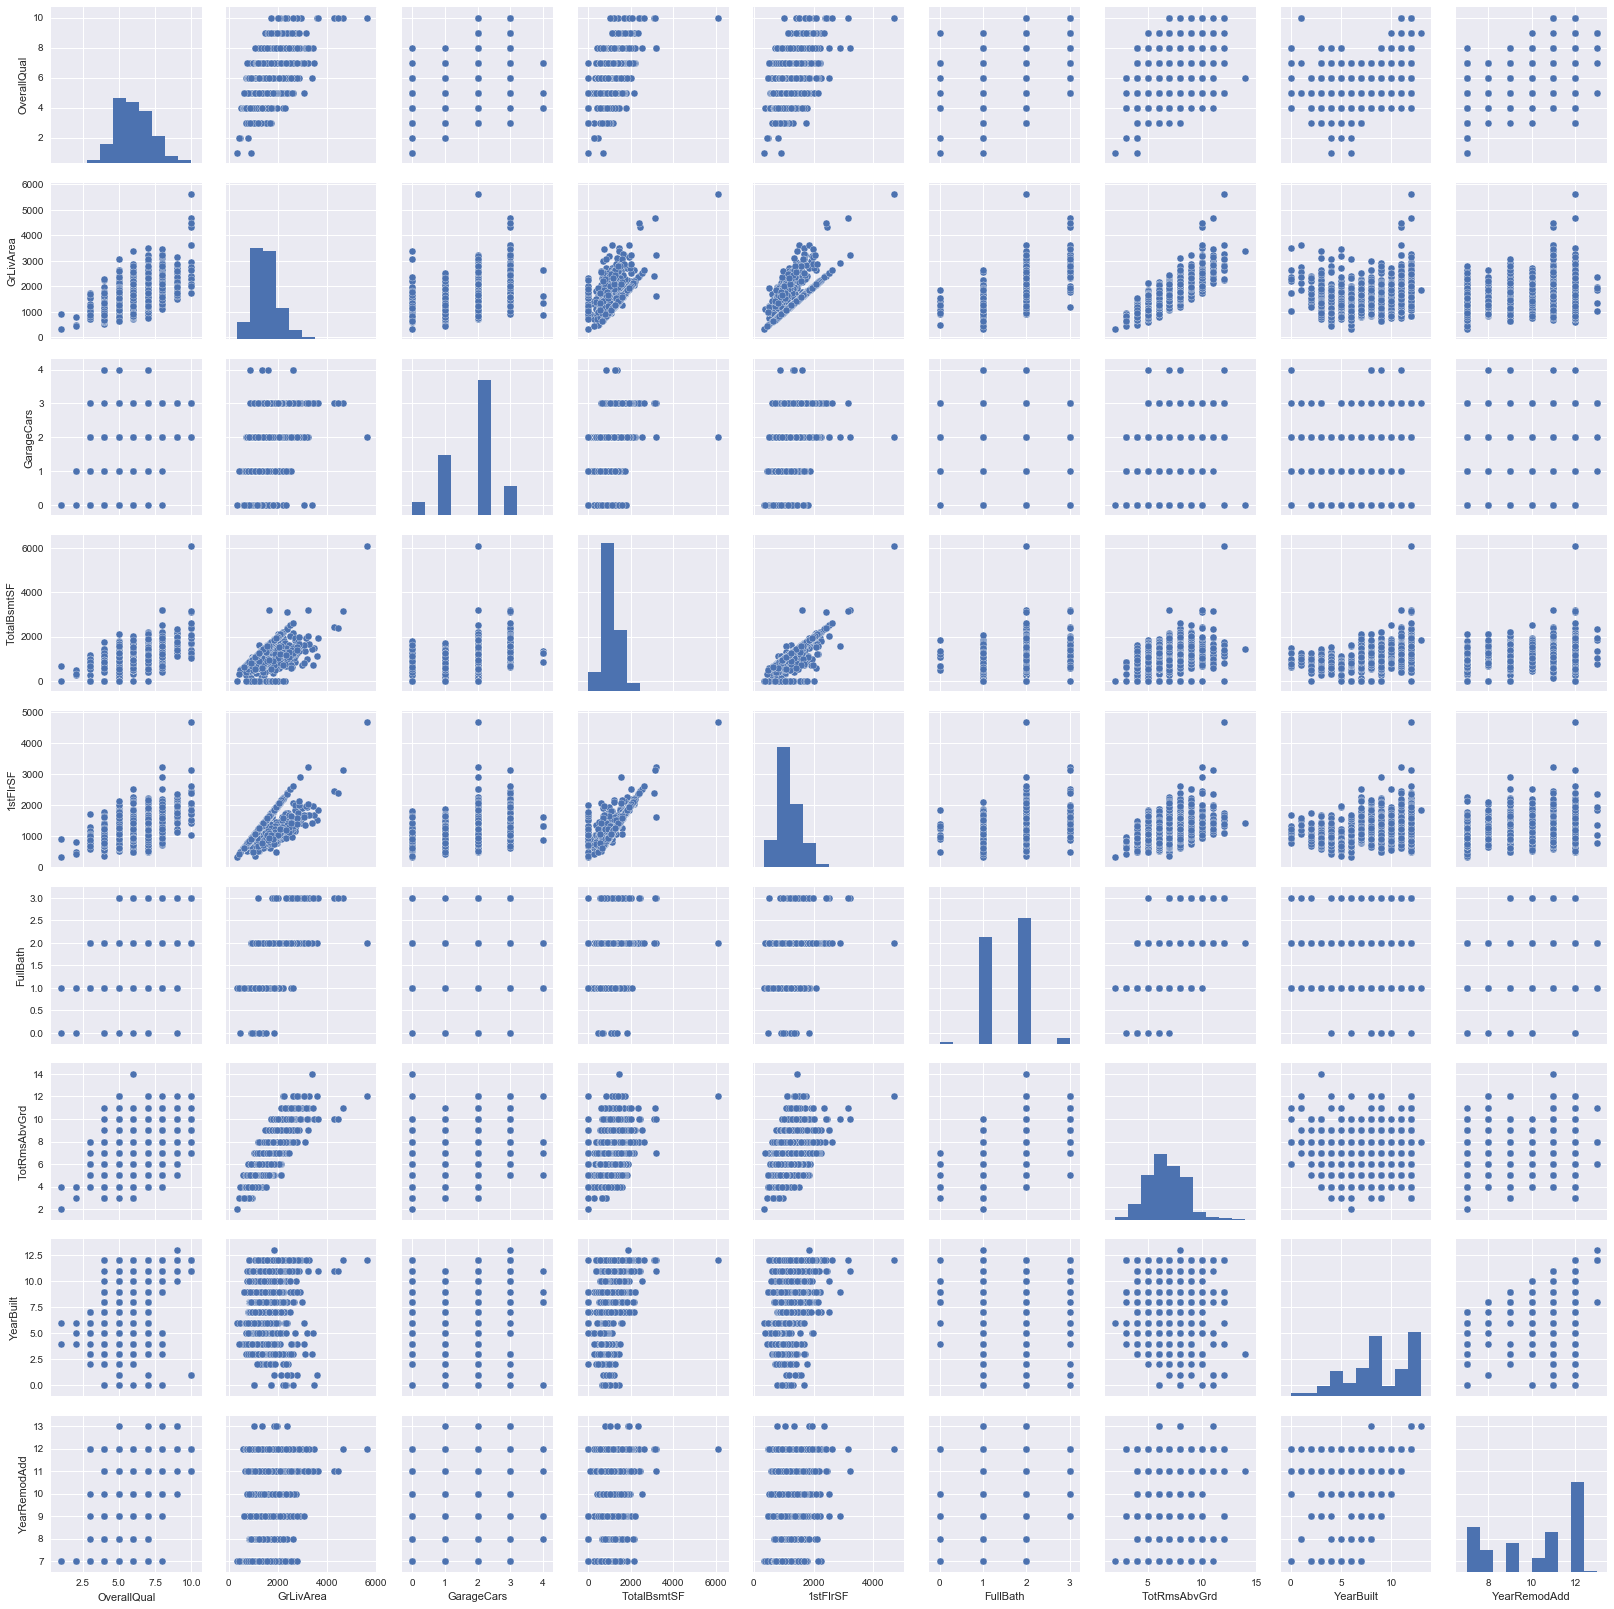

In [13]:
interest_vars = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 
        'YearBuilt', 'YearRemodAdd']
predictors = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 
        'YearBuilt', 'YearRemodAdd']
sns.pairplot(df_train[predictors])

## Outliers
Now that we have our meaningful variable to examine, let's take a look at outliers among the variables plotted against SalePrice. I'm hesitant to get too carried away with eliminating datapoints too avoid overfitting the model to the training data, so we'll only remove data points if it seems strictly necessary.

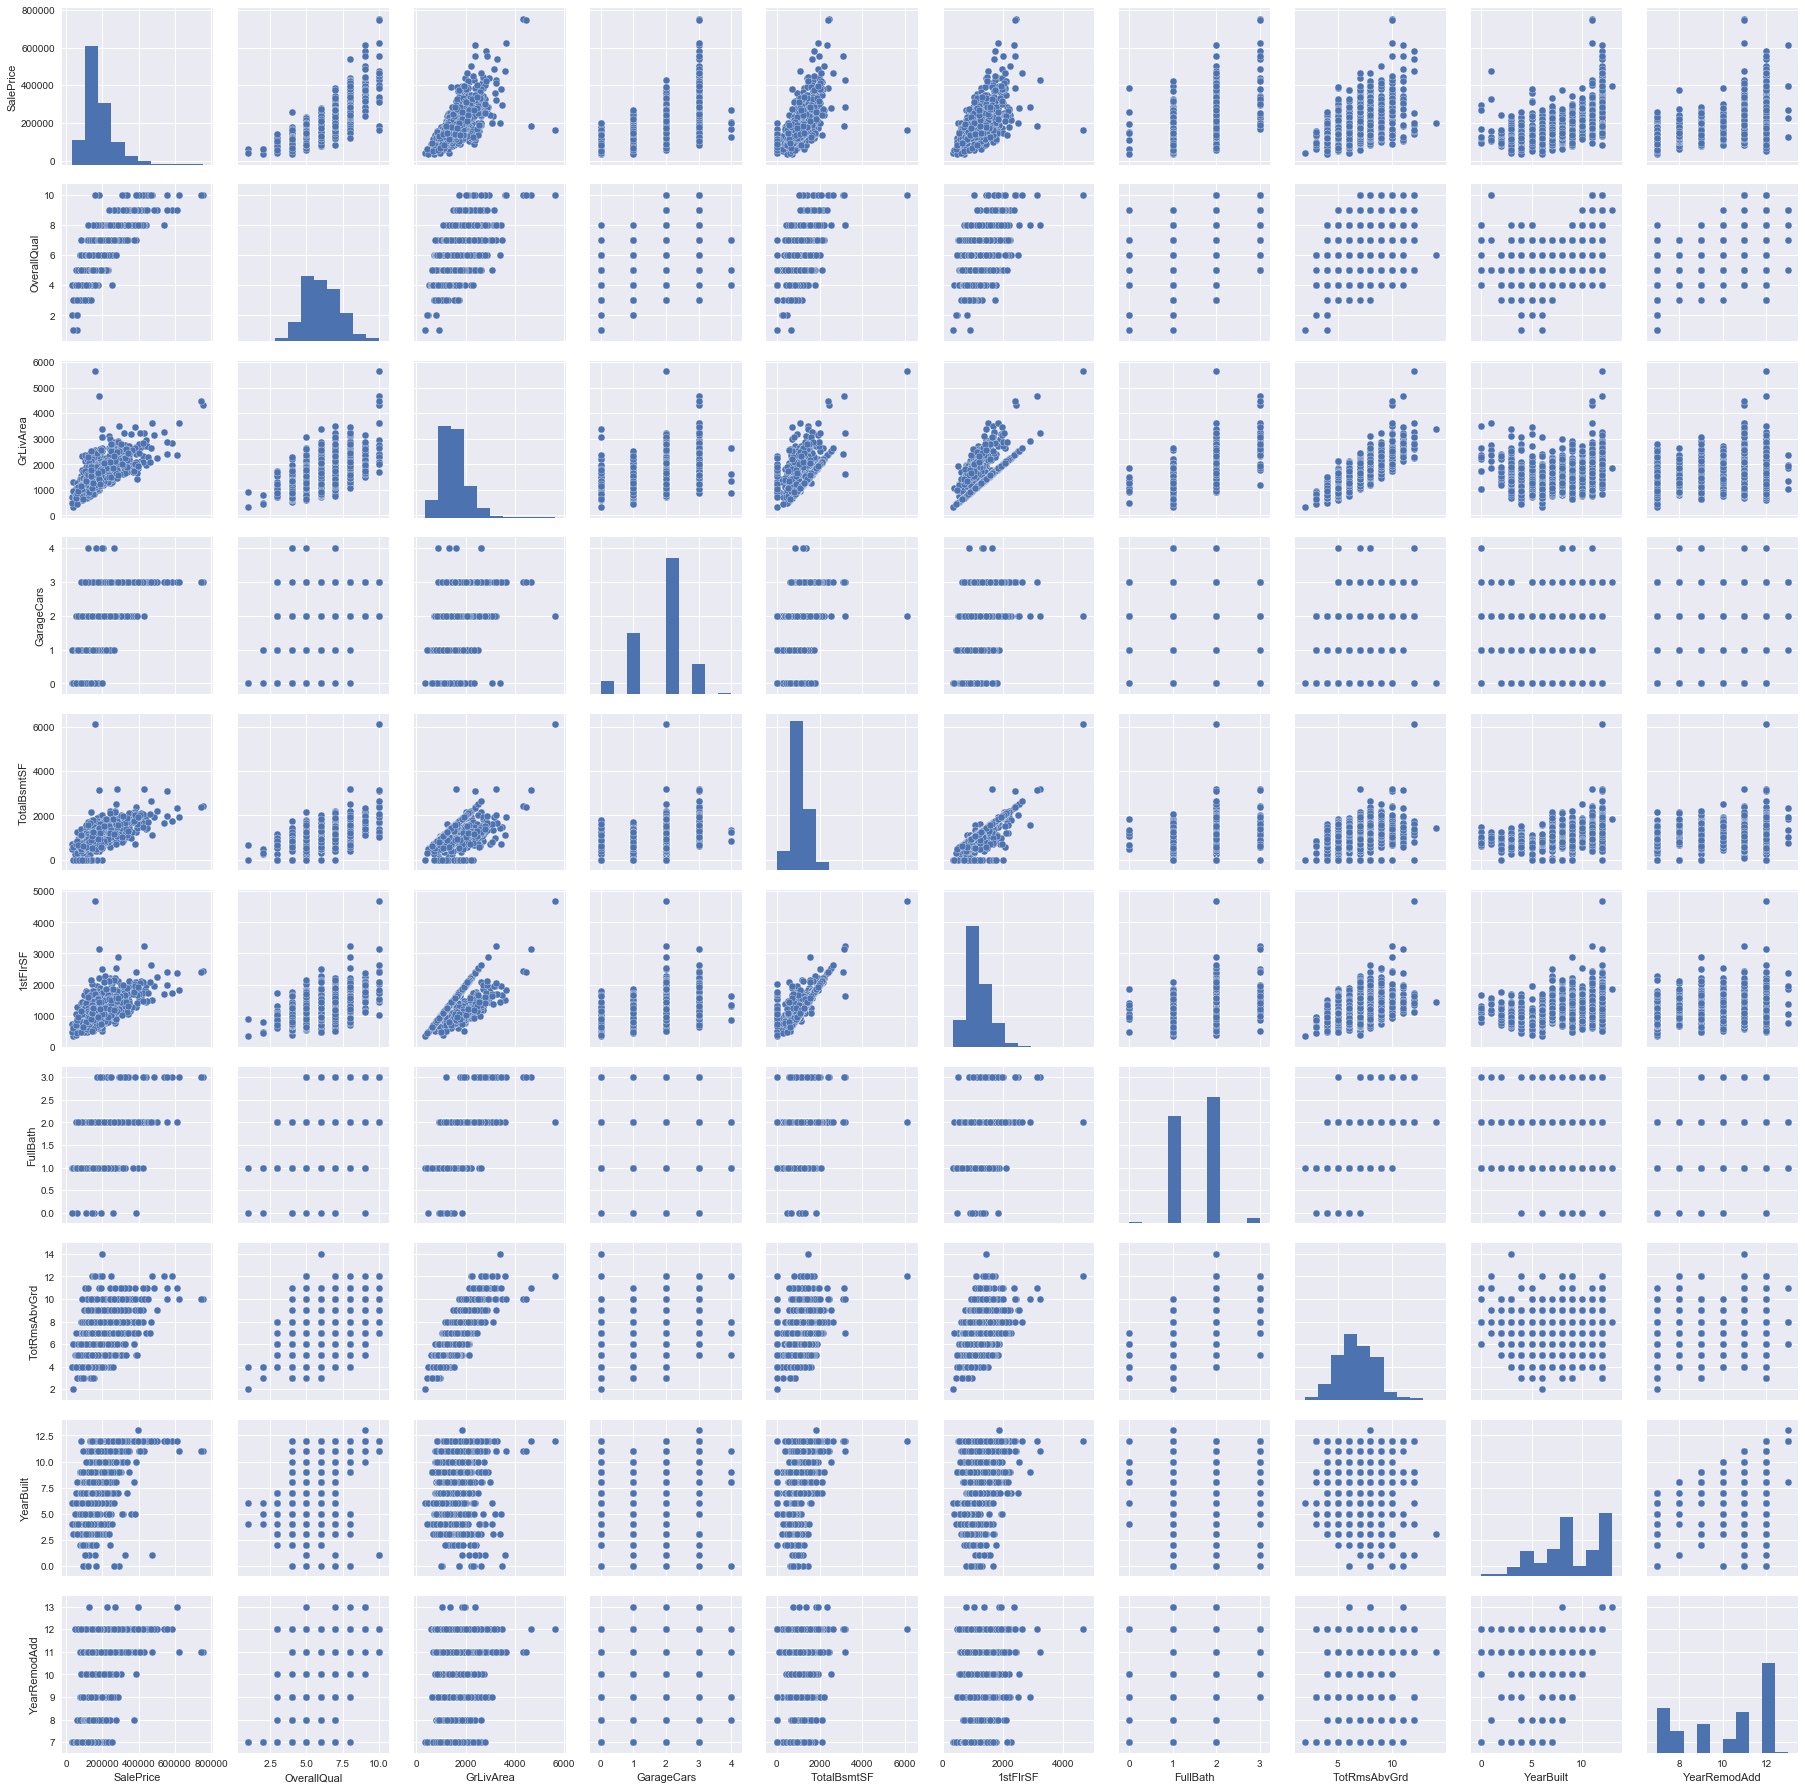

In [14]:
sns.pairplot(df_train[interest_vars])

Some data points look outside the general trend on more than one of our selling price scatterplots. We'll remove those points and take another look. 

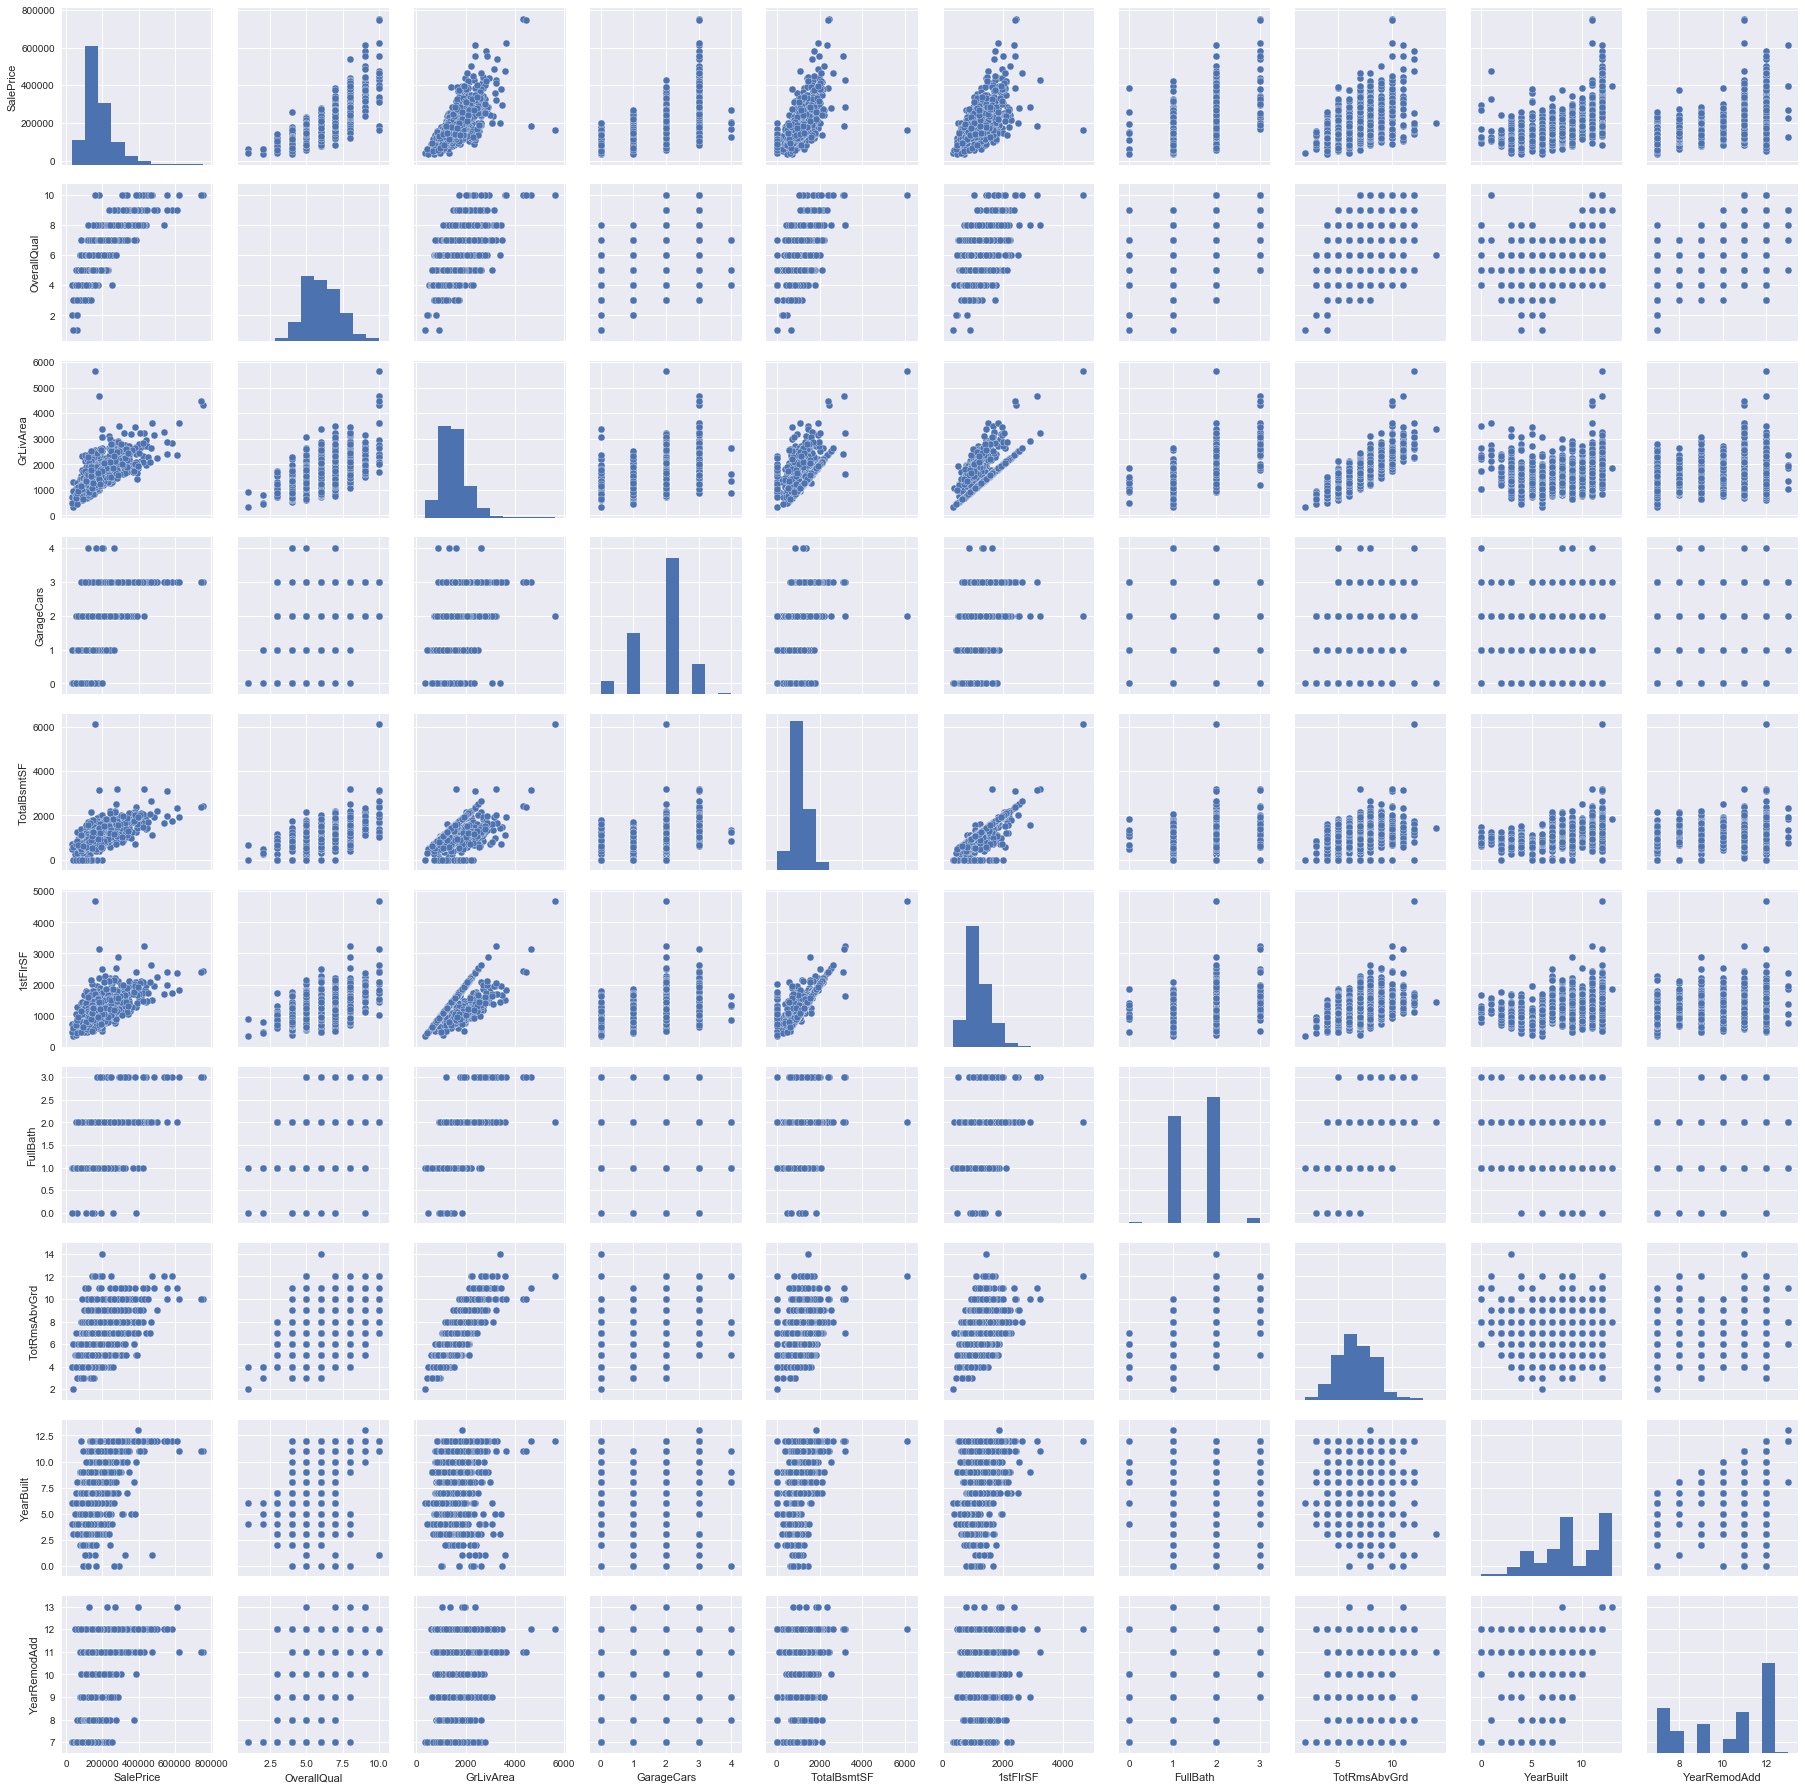

In [15]:
df_train.drop(labels=[524, 1299, 692, 1183, 186], axis=0)
sns.pairplot(df_train[interest_vars])

Let's take a closer look at our variables' correlations.

In [16]:
def p_matrix(df, variables):
    new_df = pd.DataFrame(columns=variables, index=pd.MultiIndex.from_product([variables, ['R','P-Value']]))
    for w in variables:
        for z in variables:
                p = sp.stats.pearsonr(df[w], df[z])
                new_df.loc[(w, 'R'), z] = p[0]
                new_df.loc[(w, 'P-Value'), z] = p[1]
    return new_df

p_matrix(df_train, predictors)

OverallQual     GrLivArea    GarageCars   TotalBsmtSF  \
OverallQual  R                   1      0.593007      0.600671      0.537808   
             P-Value             0  2.24751e-139  7.03716e-144  3.13027e-110   
GrLivArea    R            0.593007             1      0.467247      0.454868   
             P-Value  2.24751e-139             0   4.65009e-80   1.85787e-75   
GarageCars   R            0.600671      0.467247             1      0.434585   
             P-Value  7.03716e-144   4.65009e-80             0   2.57006e-68   
TotalBsmtSF  R            0.537808      0.454868      0.434585             1   
             P-Value  3.13027e-110   1.85787e-75   2.57006e-68             0   
1stFlrSF     R            0.476224      0.566024      0.439317       0.81953   
             P-Value    1.6232e-83  1.93681e-124   6.12452e-70             0   
FullBath     R              0.5506      0.630012      0.469672      0.323722   
             P-Value  1.66902e-116  2.60798e-162    5.5437e-81   5.73306e-37   
TotRmsAbvGrd R            0.427452      0.825489      0.362289      0.285573   
             P-Value   6.42517e-66             0   1.63009e-46    8.4698e-29   
YearBuilt    R            0.569338      0.195337      0.531834       0.38621   
             P-Value  3.36307e-126    5.0707e-14  2.16028e-107   3.90321e-53   
YearRemodAdd R            0.540402      0.282856       0.40795      0.273768   
             P-Value  1.75888e-111   2.90986e-28   1.19503e-59   1.63624e-26   

                          1stFlrSF      FullBath  TotRmsAbvGrd     YearBuilt  \
OverallQual  R            0.476224        0.5506      0.427452      0.569338   
             P-Value    1.6232e-83  1.66902e-116   6.42517e-66  3.36307e-126   
GrLivArea    R            0.566024      0.630012      0.825489      0.195337   
             P-Value  1.93681e-124  2.60798e-162             0    5.0707e-14   
GarageCars   R            0.439317      0.469672      0.362289      0.531834   
             P-Value   6.12452e-70    5.5437e-81   1.63009e-46  2.16028e-107   
TotalBsmtSF  R             0.81953      0.323722      0.285573       0.38621   
             P-Value             0   5.73306e-37    8.4698e-29   3.90321e-53   
1stFlrSF     R                   1      0.380637      0.409516      0.272948   
             P-Value             0   1.52634e-51   3.88173e-60   2.33637e-26   
FullBath     R            0.380637             1      0.554784      0.463305   
             P-Value   1.52634e-51             0  1.29012e-118     1.424e-78   
TotRmsAbvGrd R            0.409516      0.554784             1     0.0904204   
             P-Value   3.88173e-60  1.29012e-118             0   0.000542006   
YearBuilt    R            0.272948      0.463305     0.0904204             1   
             P-Value   2.33637e-26     1.424e-78   0.000542006             0   
YearRemodAdd R            0.219266      0.430217      0.185191      0.571135   
             P-Value   2.36523e-17   7.67495e-67   9.90221e-13  3.66325e-127   

                      YearRemodAdd  
OverallQual  R            0.540402  
             P-Value  1.75888e-111  
GrLivArea    R            0.282856  
             P-Value   2.90986e-28  
GarageCars   R             0.40795  
             P-Value   1.19503e-59  
TotalBsmtSF  R            0.273768  
             P-Value   1.63624e-26  
1stFlrSF     R            0.219266  
             P-Value   2.36523e-17  
FullBath     R            0.430217  
             P-Value   7.67495e-67  
TotRmsAbvGrd R            0.185191  
             P-Value   9.90221e-13  
YearBuilt    R            0.571135  
             P-Value  3.66325e-127  
YearRemodAdd R                   1  
             P-Value             0

And a bit more due diligence.

In [17]:
selector = SelectKBest(f_regression, k='all')
selector.fit(df_train[predictors], df_train['SalePrice'])
selector_scores = pd.DataFrame(data={'F-Score': selector.scores_, 'P-Value': selector.pvalues_}, index=predictors)
selector_scores

,F-Score,P-Value
OverallQual,2436.770591,2.185675e-313
GrLivArea,1470.585010,4.518034e-223
GarageCars,1013.705666,2.498644e-169
TotalBsmtSF,880.341282,9.484229e-152
1stFlrSF,845.524488,5.394711e-147
FullBath,668.430296,1.236470e-121
TotRmsAbvGrd,580.762801,2.772281e-108
YearBuilt,529.451049,3.369275e-100
YearRemodAdd,466.379635,5.729463e-90


Things look good, so let's get into vetting our independent variables.

## Independent Variable Assumptions
### Mulitcollinearity
To build our model we'll have to remove independent variables that are correlated with one another as well as with the dependent variable, or else our coefficients could be thrown out of whack.

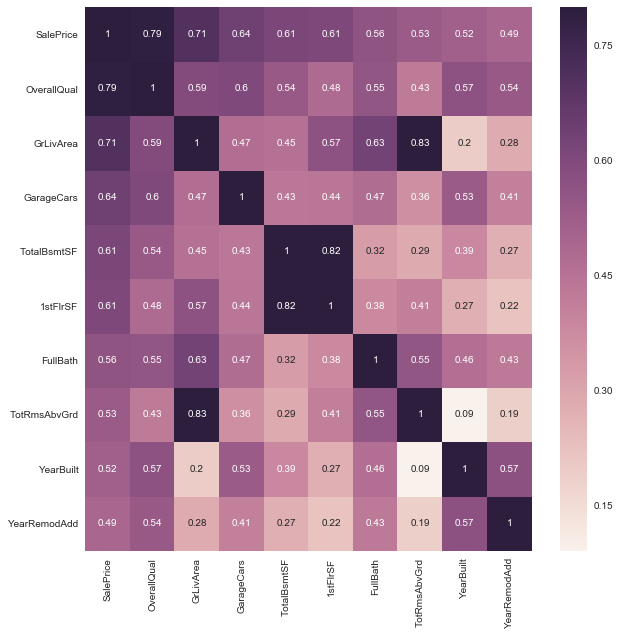

In [18]:
fig, ax = plt.subplots(figsize=(10,10))
corr_sub_matrix = df_train[interest_vars].corr()
sns.heatmap(corr_sub_matrix, annot=True, vmax=0.8)

We can see that 1stFlrSF and TotalBsmtSF are very highly correlated, as are TotRmsAbvGrd and GrLivArea. TotalBsmtSF and GrLivArea have the stronger correlations with selling price, so we'll eliminate the other variables.

In [19]:
predictors.remove('1stFlrSF')
interest_vars.remove('1stFlrSF')
predictors.remove('TotRmsAbvGrd')
interest_vars.remove('TotRmsAbvGrd')

And we'll look at our correlation heat map one more time with the remaining predictor variables.

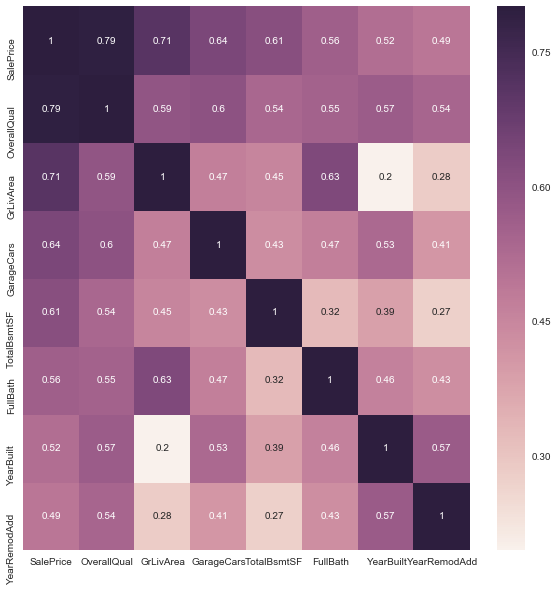

In [20]:
fig, ax = plt.subplots(figsize=(10,10))
corr_sub_matrix = df_train[interest_vars].corr()
sns.heatmap(corr_sub_matrix, annot=True, vmax=0.8)

 GrLivArea does have a considerable correlation with FullBath, but I don't feel the correlation is strong enough to merit removing one of those variables.

In [21]:
qual_predictors = ['OverallQual', 'GarageCars', 'FullBath', 'YearBuilt', 'YearRemodAdd']

### Normality
We'll examine our continuous variables' distributions for normality, starting with our dependent variable.
#### SalePrice

1.8828757597682129

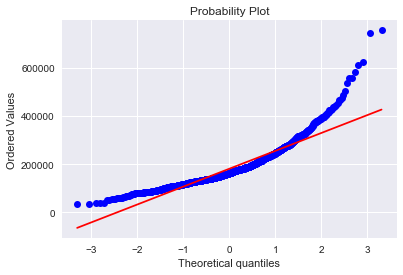

In [22]:
sp.stats.probplot(df_train['SalePrice'], plot=plt)
df_train['SalePrice'].skew()

/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


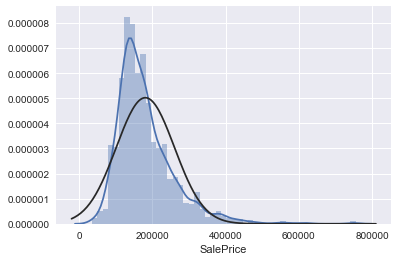

In [23]:
sns.distplot(df_train['SalePrice'], fit=sp.stats.norm)

Our dependent variable is looking skewed. We'll see if a log transformation can better approximated normality

0.12133506220520406

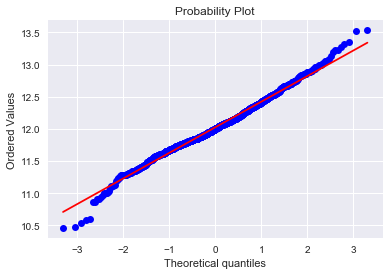

In [24]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])
sp.stats.probplot(df_train['SalePrice'], plot=plt)
df_train['SalePrice'].skew()

/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


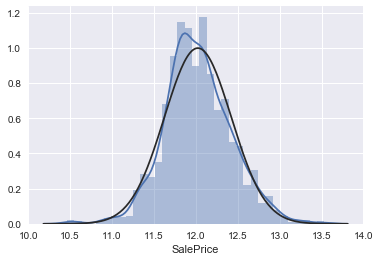

In [25]:
sns.distplot(df_train['SalePrice'], fit=sp.stats.norm)

Looking much better.
#### GrLivArea

1.3665603560164552

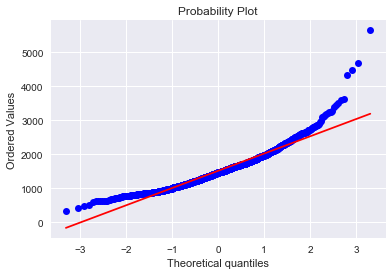

In [26]:
sp.stats.probplot(df_train['GrLivArea'], plot=plt)
df_train['GrLivArea'].skew()

/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


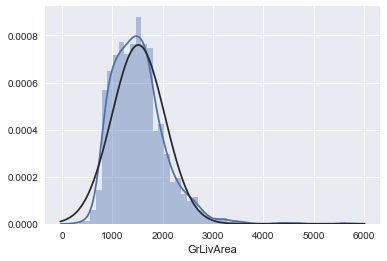

In [27]:
sns.distplot(df_train['GrLivArea'], fit=sp.stats.norm)

There is a slight bend, a log transformation should work for us again.

In [28]:
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 5.81114099,  6.08221891,  6.1737861 , ...,  8.40648507,
          8.45019832,  8.63799389])),
 (0.33334425318908867, 7.2677743833110044, 0.99773231606806079))

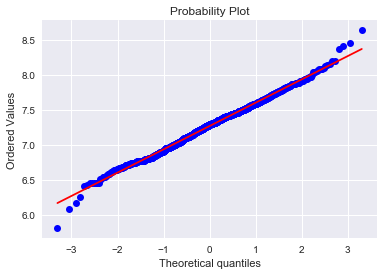

In [29]:
sp.stats.probplot(df_train['GrLivArea'], plot=plt)

/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


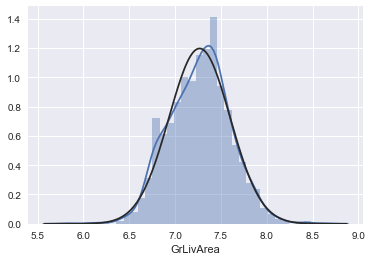

In [30]:
sns.distplot(df_train['GrLivArea'], fit=sp.stats.norm)

Just like magic.

#### TotalBsmtSF

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([   0,    0,    0, ..., 3200, 3206, 6110])),
 (420.29496021095531, 1057.4294520547944, 0.95645345676792737))

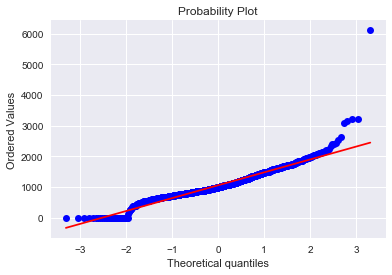

In [31]:
sp.stats.probplot(df_train['TotalBsmtSF'], plot=plt)

/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


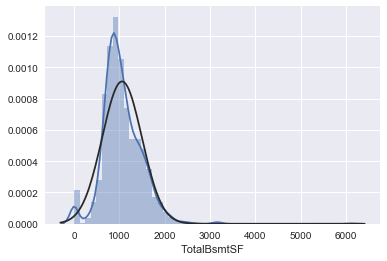

In [32]:
sns.distplot(df_train['TotalBsmtSF'], fit=sp.stats.norm)

Another log transformation should remedy this curve, but there's a hang-up that shows up in the plot below. We won't be able to perform a log transformation if there are zero values in the basement square footage data. We'll have to set the existence of a basement as a condition, and perform a log transformation on the observations with a basement.

In [33]:
# Create a binary variable for having or not having a basement

df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0

# Where TotalBsmtSF is not 0, HasBsmt is 1

df_train.loc[df_train['TotalBsmtSF'] > 0, 'HasBsmt'] = 1

# And our log transformation

df_train.loc[df_train['HasBsmt'] == 1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


In [34]:
df_train.drop('HasBsmt', axis=1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247694
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109011
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317167
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849398
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429216
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,11.870600
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,12.634603
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,12.206073
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,11.774520


((array([-3.29794035, -3.04021209, -2.89685519, ...,  2.89685519,
          3.04021209,  3.29794035]),
  array([ 4.65396035,  5.24702407,  5.5759491 , ...,  8.07090609,
          8.07277933,  8.71768205])),
 (0.35851584053637514, 6.9250312818451842, 0.99050756708660592))

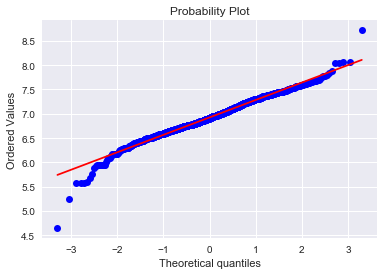

In [35]:
sp.stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


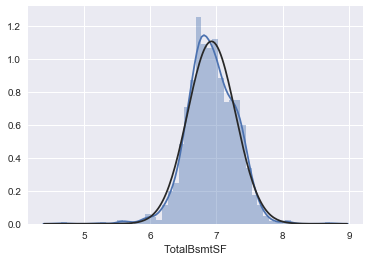

In [36]:
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=sp.stats.norm)

And now we have a more normal distribution.

### Homoscedasticity
Here we'll be looking to see if the errors of the dependent variable predicted with the independent variables remain constant. Variables displaying heteroscedasticity should have a conical or diamond shape to the spread.

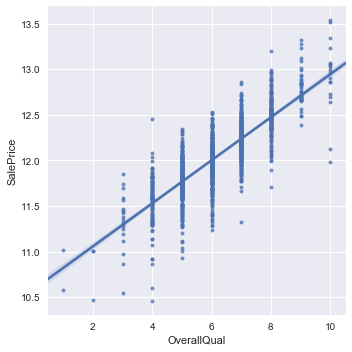

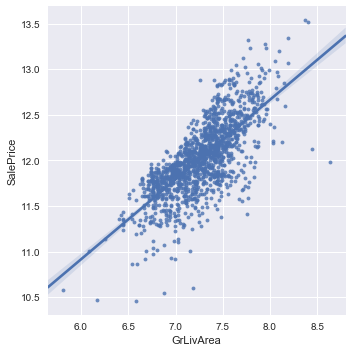

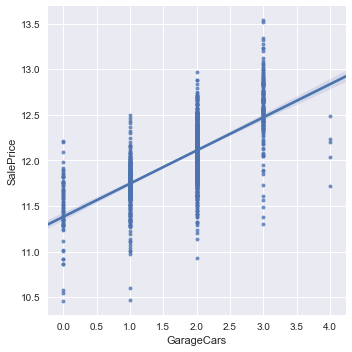

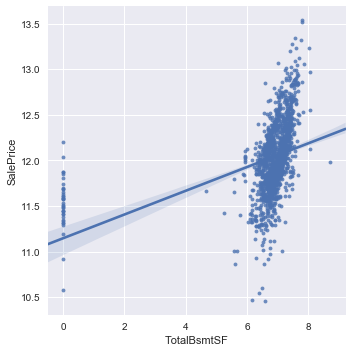

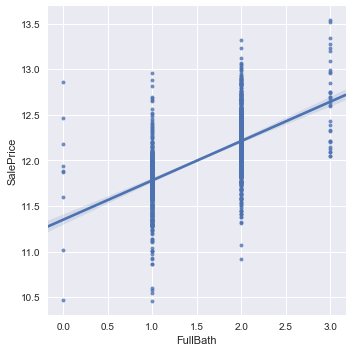

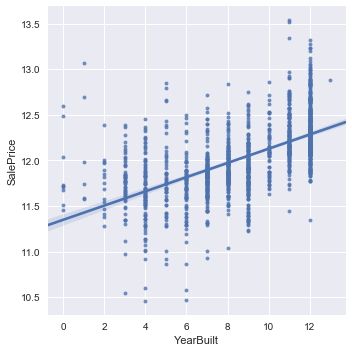

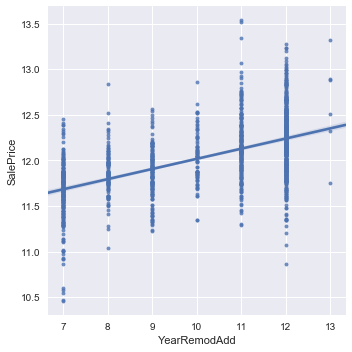

In [37]:
for variable in predictors:
    sns.lmplot(variable, 'SalePrice', data=df_train, scatter_kws={"s": 15})

The spread of each variable seems fairly consistently distributed above and below the regression line, but the scatter plot for TotalBsmtSF tells us we still have a problem with this variable outside normality: we performed a log transformation on the non-zero values in that variable a moment ago, but those zeros are still in there, skewing the distribution.

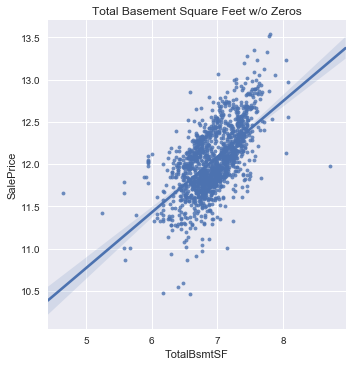

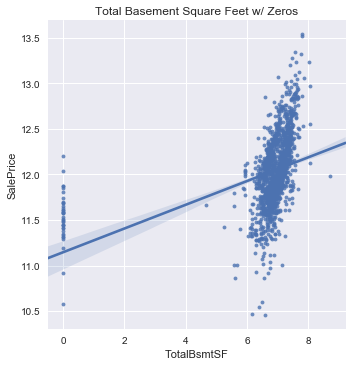

In [38]:
sns.lmplot('TotalBsmtSF', 'SalePrice', data=df_train[df_train['TotalBsmtSF'] > 0], scatter_kws={"s": 15})
plt.title('Total Basement Square Feet w/o Zeros')
sns.lmplot('TotalBsmtSF', 'SalePrice', data=df_train, scatter_kws={"s": 15})
plt.title('Total Basement Square Feet w/ Zeros')

It's clear that the regression with zeros and without zeros are very different. The accuracy of our model is going to suffer from this if we don't first qualify whether an observation being predicted has a basement or not. Though we have our binary "Has Basement" categorical variable trick, this does not help us predict the selling price based on the square footage of that basement. I can think of several immediate solutions:

* *We can train two different models, one for homes with basements and one for homes without.*


In [39]:
df_train[df_train['TotalBsmtSF'] < 1]['TotalBsmtSF'].count()

37

We only have 37 observations with no basement; out of a dataset with 1455 observations, 37 just won't cut it. Had we had a large enough number of observations, I would feel more comfortable taking this approach.

* *We can bin our basement square footage, making it an ordinal categorical variable.*

But the loss of information from making a continuous variable into a categorical one isn't an attractive option either. There is one more option that comes to mind:

* *We remove our observations with no basements/basements with 0 square footage.*

I'm not particularly happy about this option, but I do think it is the best one. It will give a clean regression line, and one that will accurately represent homes with no basement. I'm sure there are far more effective ways of dealing with this problem, but I am not familiar with or experienced in those approaches.

In [40]:
df_train = df_train[df_train['TotalBsmtSF'] > 0]

## Dummy Variables

Let's create dummy variables for our categorical variables.

In [41]:
df_predict = df_train[predictors]
df_predict = pd.get_dummies(df_predict, columns=qual_predictors, drop_first=True)

In [42]:
df_predict.columns

Index(['GrLivArea', 'TotalBsmtSF', 'OverallQual_2', 'OverallQual_3',
       'OverallQual_4', 'OverallQual_5', 'OverallQual_6', 'OverallQual_7',
       'OverallQual_8', 'OverallQual_9', 'OverallQual_10', 'GarageCars_1',
       'GarageCars_2', 'GarageCars_3', 'GarageCars_4', 'FullBath_1',
       'FullBath_2', 'FullBath_3', 'YearBuilt_1', 'YearBuilt_2', 'YearBuilt_3',
       'YearBuilt_4', 'YearBuilt_5', 'YearBuilt_6', 'YearBuilt_7',
       'YearBuilt_8', 'YearBuilt_9', 'YearBuilt_10', 'YearBuilt_11',
       'YearBuilt_12', 'YearBuilt_13', 'YearRemodAdd_8', 'YearRemodAdd_9',
       'YearRemodAdd_10', 'YearRemodAdd_11', 'YearRemodAdd_12',
       'YearRemodAdd_13'],
      dtype='object')

We have another hurdle. Our training data must be missing some specific values of certain variables: OverallQual, for instance, is on a 1-10 scale, but we are missing observations with a #2 overall quality rating. Because of this, our dummy variables may differ between our training and testing data

## Testing Data
Our predictors are chosen and vetted, so let's start working with our testing data.

In [43]:
df_test = pd.read_csv('/Users/jordanbauer/Data Mining Learning/Personal Projects/Multiple Regression/real_estate_test.csv')
df_test.set_index('Id', inplace=True)
df_test = df_test[predictors]
df_test.columns

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath',
       'YearBuilt', 'YearRemodAdd'],
      dtype='object')

We'll have to refactor our yearly variables just as we did in the training data.

In [44]:
for var in ['YearBuilt', 'YearRemodAdd']:
    df_test.loc[df_test[var] <= 1889, var] = 0
    df_test.loc[(df_test[var] >= 1890) & (df_test[var] < 1900), var] = 1
    df_test.loc[(df_test[var] >= 1900) & (df_test[var] < 1910), var] = 2
    df_test.loc[(df_test[var] >= 1910) & (df_test[var] < 1920), var] = 3
    df_test.loc[(df_test[var] >= 1920) & (df_test[var] < 1930), var] = 4
    df_test.loc[(df_test[var] >= 1930) & (df_test[var] < 1940), var] = 5
    df_test.loc[(df_test[var] >= 1940) & (df_test[var] < 1950), var] = 6
    df_test.loc[(df_test[var] >= 1950) & (df_test[var] < 1960), var] = 7
    df_test.loc[(df_test[var] >= 1960) & (df_test[var] < 1970), var] = 8
    df_test.loc[(df_test[var] >= 1970) & (df_test[var] < 1980), var] = 9
    df_test.loc[(df_test[var] >= 1980) & (df_test[var] < 1990), var] = 10
    df_test.loc[(df_test[var] >= 1990) & (df_test[var] < 2000), var] = 11
    df_test.loc[(df_test[var] >= 2000) & (df_test[var] < 2010), var] = 12
    df_test.loc[(df_test[var] >= 2010), var] = 13

Now we'll look at missing data.

In [45]:
show_missing(df_test)

,Count,% of Missing Data
TotalBsmtSF,1,0.000685
GarageCars,1,0.000685


This means that these properties have no basement or no garage, so we'll refactor them as zeros.

In [46]:
df_test['TotalBsmtSF'].fillna(value=0, inplace=True)
df_test['GarageCars'].fillna(value=0, inplace=True)

And we'll perform a log transformation on the basement area of our testing data just as we did above.

In [47]:
df_test['HasBsmt'] = pd.Series(len(df_test['TotalBsmtSF']), index=df_test.index)
df_test['HasBsmt'] = 0
df_test.loc[df_test['TotalBsmtSF']>0,'HasBsmt'] = 1

In [48]:
df_test.loc[df_test['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_test['TotalBsmtSF'])
df_test['GrLivArea'] = np.log(df_test['GrLivArea'])

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [49]:
df_test = df_test.drop('HasBsmt', axis=1)

Now we need dummy variables for our testing data.

In [50]:
df_test = pd.get_dummies(df_test, columns=qual_predictors, drop_first=True)
df_test.columns

Index(['GrLivArea', 'TotalBsmtSF', 'OverallQual_2', 'OverallQual_3',
       'OverallQual_4', 'OverallQual_5', 'OverallQual_6', 'OverallQual_7',
       'OverallQual_8', 'OverallQual_9', 'OverallQual_10', 'GarageCars_1.0',
       'GarageCars_2.0', 'GarageCars_3.0', 'GarageCars_4.0', 'GarageCars_5.0',
       'FullBath_1', 'FullBath_2', 'FullBath_3', 'FullBath_4', 'YearBuilt_1',
       'YearBuilt_2', 'YearBuilt_3', 'YearBuilt_4', 'YearBuilt_5',
       'YearBuilt_6', 'YearBuilt_7', 'YearBuilt_8', 'YearBuilt_9',
       'YearBuilt_10', 'YearBuilt_11', 'YearBuilt_12', 'YearBuilt_13',
       'YearRemodAdd_8', 'YearRemodAdd_9', 'YearRemodAdd_10',
       'YearRemodAdd_11', 'YearRemodAdd_12', 'YearRemodAdd_13'],
      dtype='object')

I can tell already that the dummy variables in our tesing data don't match the training data, just as suspected.

In [51]:
df_predict.shape

(1423, 37)

In [52]:
df_test.shape

(1459, 39)

Regrettably, we'll have to remove these non-corresponding dummy variables so the shapes of our training and testing data match

In [53]:
df_test = df_test.drop(labels=['FullBath_4', 'OverallQual_2', 'GarageCars_1.0', 'GarageCars_5.0'], axis=1)
df_predict = df_predict.drop(labels=['OverallQual_2', 'GarageCars_1'], axis=1)
df_test.rename(columns={'GarageCars_2.0': 'GarageCars_2', 'GarageCars_3.0': 'GarageCars_3', 
                        'GarageCars_4.0': 'GarageCars_4'}, inplace=True)

In [54]:
df_predict.shape

(1423, 35)

In [55]:
df_test.shape

(1459, 35)

Now that things are matched up, it's time to fit our model.

## Finalizing the Model

In [56]:
X = df_predict
y = df_train['SalePrice']
model = LinearRegression().fit(X, y)

In [57]:
model.coef_

array([ 0.42229893,  0.16596889,  0.01589953,  0.2403071 ,  0.33676232,
        0.40755741,  0.50495735,  0.62734256,  0.80364405,  0.78024554,
        0.08236125,  0.17445388,  0.18898727,  0.01462921, -0.00681254,
        0.06843352, -0.02638918,  0.07274946,  0.10541918,  0.13317644,
        0.22840514,  0.22478602,  0.27288703,  0.29115925,  0.28607648,
        0.30792802,  0.26371107,  0.25260655,  0.23337353,  0.02423902,
        0.01676737,  0.05996713,  0.13843076,  0.14071311,  0.25705555])

In [58]:
model.intercept_

6.9746369367885794

The coefficient of determination for our model when predicting the training data.

In [59]:
model.score(X, y)

0.84016967604111303

We would likely have a stronger R-squared had we not had to eliminate some of our predictor variables, but if our training data doesn't provide the whole picture, what else can we do?

Time to wrap things up.

In [60]:
results = pd.Series(data=np.exp(model.predict(df_test))).round(0)
results

0       113303.0
1       147361.0
2       170479.0
3       181729.0
4       217184.0
5       178324.0
6       166699.0
7       170317.0
8       200745.0
9       109592.0
10      198785.0
11      113207.0
12      111603.0
13      155882.0
14      127428.0
15      422563.0
16      296091.0
17      332472.0
18      290533.0
19      440323.0
20      313081.0
21      224056.0
22      176270.0
23      178390.0
24      160717.0
25      202140.0
26      327441.0
27      268659.0
28      207820.0
29      187308.0
          ...   
1429     70597.0
1430    149448.0
1431     22328.0
1432    122150.0
1433     53740.0
1434    255932.0
1435    248275.0
1436    181644.0
1437    184196.0
1438    235494.0
1439    150947.0
1440    181398.0
1441    181906.0
1442    297008.0
1443    348334.0
1444     32137.0
1445    220104.0
1446    107316.0
1447    125540.0
1448    187362.0
1449     82804.0
1450    102003.0
1451    139224.0
1452    102003.0
1453    102003.0
1454    102003.0
1455    102003.0
1456    166125

## Final Thoughts
This was a fun and rewarding project to get into some extracurricular personal analytics projects. I was learning on the fly as I went, and I have a better understanding of building and fitting regression models; it was also a very valuable environment to familiarize myself with Pandas, NumPy, and Seaborn. There are much bigger fish to fry, in the world of regression and elsewhere, but this was certainly a great place to start.